## Problem2

In [54]:
import numpy as np
import matplotlib.pyplot as plt

#最適化器
def optimizer(l, A, mu, iteration = 150):
    #初期化
    L = np.max(np.linalg.eig(2.0 * A)[0])
    lL = l / L
    wt = np.ones((2, 1))
    ws = np.zeros((iteration,2))
    norm = np.zeros(iteration)
    #反復
    for i in range(iteration):
        ws[i] = wt.T
        #wの更新
        tmp = wt - 2 * A.dot(wt - mu) / L
        for j in range(len(wt)):
            wt[j] = max([0.0, tmp[j] - lL]) if -lL < tmp[j] else tmp[j] + lL
    #プロット用ノルムの計算
    for i in range(iteration):
        tmp = ws[i] - ws[-1]
        norm[i] = np.sqrt(tmp.T.dot(tmp))
    return norm
        
#各変数初期化
A = np.array([[3.0, 0.5], [0.5, 1.0]])
mu = np.array([[1.0], [2.0]])
lambdas = np.array([2, 4, 6])
norms = []
for l in lambdas:
    norms.append(optimizer(l, A, mu))

print("Finished!!")

Finished!!


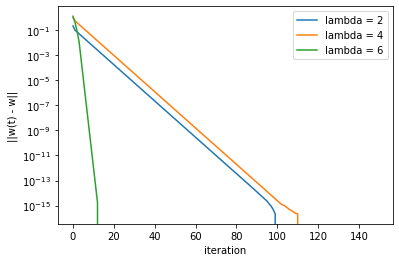

In [55]:
#プロット
plt.plot(norms[0], label="lambda = 2")
plt.plot(norms[1], label="lambda = 4")
plt.plot(norms[2], label="lambda = 6")
plt.yscale('log')
plt.xlabel("iteration")
plt.ylabel("||w(t) - w||")
plt.legend()
plt.savefig("Problem2.png")